In [ ]:
import pandas as pd
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Get file name
file_name = list(uploaded.keys())[0]

# Load the CSV file
df = pd.read_csv(file_name)

# Display the first few rows
print(df.head())
print(df.info())  # Check data types and missing values


Saving transaction_data.csv to transaction_data (1).csv
  Transaction ID Sender Account ID Receiver Account ID  Transaction Amount  \
0  TXN9520068950          ACC14994            ACC16656              495.90   
1  TXN9412011085          ACC58958            ACC32826              529.62   
2  TXN4407425052          ACC56321            ACC92481              862.47   
3  TXN2214150284          ACC48650            ACC76457             1129.88   
4  TXN4247571145          ACC60921            ACC11419              933.24   

  Transaction Type            Timestamp Transaction Status  Fraud Flag  \
0          Deposit  2025-01-17 10:14:00             Failed        True   
1       Withdrawal  2025-01-17 10:51:00            Success       False   
2       Withdrawal  2025-01-17 10:50:00             Failed       False   
3         Transfer  2025-01-17 10:56:00            Success        True   
4          Deposit  2025-01-17 10:25:00            Success        True   

  Geolocation (Latitude/Longit

Saving transaction_data.csv to transaction_data (2).csv

Missing Values in Dataset:
Transaction ID                      0
Sender Account ID                   0
Receiver Account ID                 0
Transaction Amount                  0
Transaction Type                    0
Timestamp                           0
Transaction Status                  0
Fraud Flag                          0
Geolocation (Latitude/Longitude)    0
Device Used                         0
Network Slice ID                    0
Latency (ms)                        0
Slice Bandwidth (Mbps)              0
PIN Code                            0
dtype: int64

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Transaction ID                    1000 non-null   object        
 1   Sender Account ID              

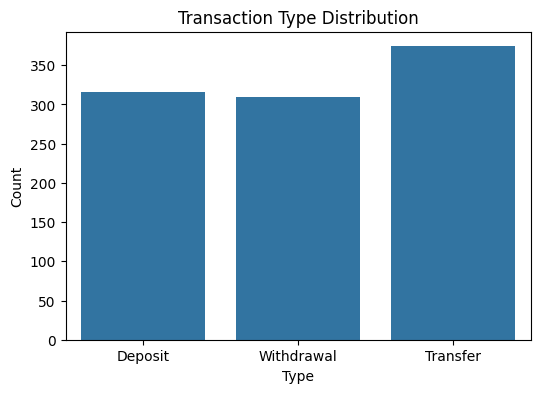

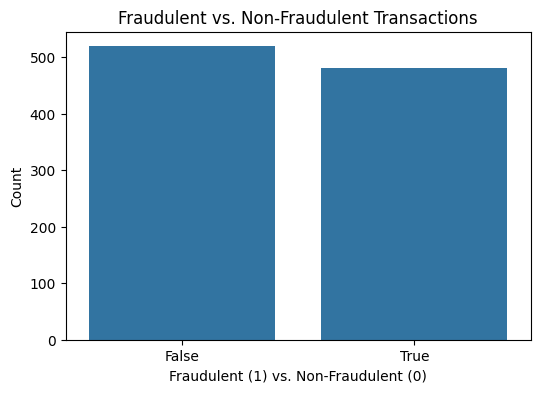


Top 5 Fraudulent Transactions:
  Transaction ID Sender Account ID Receiver Account ID  Transaction Amount  \
0  TXN9520068950          ACC14994            ACC16656              495.90   
3  TXN2214150284          ACC48650            ACC76457             1129.88   
4  TXN4247571145          ACC60921            ACC11419              933.24   
6  TXN2169752734          ACC43792            ACC51105               72.97   
7  TXN3109277527          ACC48227            ACC93536             1135.80   

  Transaction Type           Timestamp Transaction Status  Fraud Flag  \
0          Deposit 2025-01-17 10:14:00             Failed        True   
3         Transfer 2025-01-17 10:56:00            Success        True   
4          Deposit 2025-01-17 10:25:00            Success        True   
6       Withdrawal 2025-01-17 10:25:00            Success        True   
7          Deposit 2025-01-17 10:56:00             Failed        True   

  Geolocation (Latitude/Longitude) Device Used Network Slice

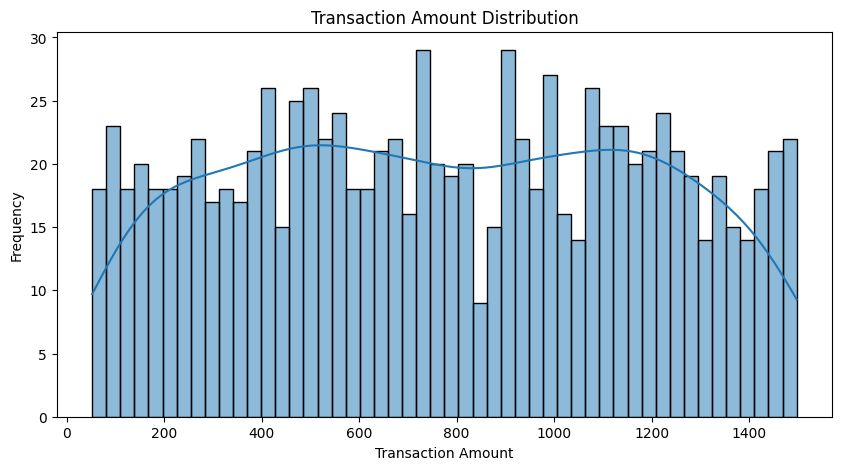


Top 5 Highest Transactions from SQL Query:
  Transaction ID Sender Account ID Receiver Account ID  Transaction Amount  \
0  TXN1696527060          ACC44804            ACC26269             1497.76   
1  TXN8741905833          ACC67128            ACC77786             1495.01   
2  TXN4979176158          ACC76875            ACC22724             1494.20   
3  TXN7486103501          ACC14340            ACC33467             1494.03   
4  TXN4433757533          ACC47545            ACC63108             1494.01   

  Transaction Type            Timestamp Transaction Status  Fraud Flag  \
0         Transfer  2025-01-17 10:54:00            Success           1   
1         Transfer  2025-01-17 10:46:00            Success           1   
2          Deposit  2025-01-17 10:31:00             Failed           1   
3         Transfer  2025-01-17 10:07:00            Success           1   
4         Transfer  2025-01-17 10:28:00            Success           0   

  Geolocation (Latitude/Longitude) Device 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from google.colab import files

uploaded = files.upload()


file_name = list(uploaded.keys())[0]


df = pd.read_csv(file_name)

df["Timestamp"] = pd.to_datetime(df["Timestamp"])


print("\nMissing Values in Dataset:")
print(df.isnull().sum())


df.fillna({"Transaction Status": "Unknown", "Device Used": "Unknown"}, inplace=True)


df.drop_duplicates(inplace=True)


print("\nDataset Overview:")
print(df.info())
print(df.head())




plt.figure(figsize=(6, 4))
sns.countplot(x="Transaction Type", data=df)
plt.title("Transaction Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()



s
plt.figure(figsize=(6, 4))
sns.countplot(x="Fraud Flag", data=df)
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Fraudulent (1) vs. Non-Fraudulent (0)")
plt.ylabel("Count")
plt.show()


fraud_transactions = df[df["Fraud Flag"] == True]
print("\nTop 5 Fraudulent Transactions:")
print(fraud_transactions.head())


plt.figure(figsize=(10, 5))
sns.histplot(df["Transaction Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


conn = sqlite3.connect("bank_transactions.db")


df.to_sql("transactions", conn, if_exists="replace", index=False)


query = "SELECT * FROM transactions ORDER BY `Transaction Amount` DESC LIMIT 5;"
top_transactions = pd.read_sql(query, conn)

print("\nTop 5 Highest Transactions from SQL Query:")
print(top_transactions)


query2 = "SELECT `Transaction Type`, COUNT(*) as count FROM transactions GROUP BY `Transaction Type`;"
transaction_type_count = pd.read_sql(query2, conn)
print("\nTransaction Type Count from SQL Query:")
print(transaction_type_count)

query3 = """
SELECT
    (COUNT(CASE WHEN `Fraud Flag` = 1 THEN 1 END) * 100.0) / COUNT(*) as fraud_percentage
FROM transactions;
"""
fraud_percentage = pd.read_sql(query3, conn)
print("\nFraud Percentage from SQL Query:")
print(fraud_percentage)


print("\n✔ Data Analysis & SQL Querying Completed Successfully!")
